# Local Sensitivity Analysis
 **Saleh Rezaeiravesh and Philipp Schlatter** <br/> 
 saleh.rezaeiravesh@manchester.ac.uk and pschlatt@mech.kth.se <br/> 
 Modelling & Simulation, Department of Mechanical, Aerospace and Civil Engineering (MACE), The University of Manchester, UK <br/> 
 SimEx/FLOW, Engineering Mechanics, KTH Royal Institute of Technology, Sweden
___

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./modules/')
import grafix
import pipeDNSdata

### Learning Objectives
* Understanding the concept of LSA,
* Learning different techniques for calculating the local sensitivities,
* Applying the LSA techniques to different model function.

## Introduction
**Local Sensitivity Analysis (LSA)** tries to address how the response of a model varies when the parameter or/and inputs are perturbed around some according nominal values. 
It also may give us a sense of how linear uncertainties propagate in the model, therefore is closely connected to the perturbation method for uncertainty propagation. 

As it will be pointed out below, the main characteristics of the LSA can be listed as:
* LSA is very relevant in scientific and engineering applications, and can be applied to various types of models (algebraic, differential equations, etc). 
* Local sensitivity of a model function with respect to each parameter, requires linearization of the model around the parameter. Therefore, the LSA results are approximate for non-linear function. 
* If there are more than one parameter in a model function, the local sensitivity 

## Methods 

At least three methods can be considered for deriving local sensitivities for model function $y=f(\mathbf{q},\chi)$:

### Differentiation
When the model function is known and is explicitely expressed in terms of the uncertain parameters, we can analytically derive $\partial f/\partial q_i$. 

### Gataeux Variational Method
When the model function is known but is not necessarily explicitly expressed in terms of the uncertain parameters, we use the [Gateaux Variational Method](https://en.wikipedia.org/wiki/Gateaux_derivative). 

Consider a functional $J: \mathcal{D}_J\subset \Omega$. If for any $x\in \mathcal{D}_J$ and arbitrary $\lambda \in \Omega$ the limit

$$
\begin{equation}
\delta J(x;\lambda) = \lim_{\varepsilon\to 0} \frac{1}{\varepsilon} [J(x+\varepsilon\lambda) - J(x)] \,,
\end{equation}
$$

exists, then $\delta J(x;\lambda) $ is called the Gateaux variation of $J$ at $x$ for the perturbation $\lambda$. 

In connection with the perturbation method for uncertainty propagation as well as local sensitivity analysis, we consider $\lambda=\delta x$ with the Gateaux variation,

$$
\begin{equation}
\delta J(x;\delta x)= \frac{d}{d\varepsilon} J(x+\varepsilon \delta x) |_{\varepsilon \to 0}
\end{equation}
$$
As we will see in examples below, this differentiation provides an efficient way to derive expressions for the local sensitivity analysis.

### Differencing Method
If the model function is not explicitly known, for instance, when we work with blackbox models, we can use differencing methods to compute the local sensitivities. This is achieved by approximating $\partial f/\partial q_i$ by using finite difference methods.

## Example: Rosenbrock Function

Rosenbrock function is algebraic with two uncertain parameters:
$$
\begin{equation}
f(q_1,q_2) = a(q_2-q_1^2)^2 + (b-q_1)^2  \,,
\end{equation}
$$
where $a$ and $b$ are two fixed constants with default values $a=100$ and $b=1$.

Applying direct differentiaton, the local sensitivity indices of $f(q_1,q_2)$ with respect to $q_1$ and $q_2$ are derived as:

$$
\begin{eqnarray}
s_{q_1} &=& \frac{\partial f}{\partial q_1} = -4 a q_1(q_2-q_1^2)-2(b-q_1) \\
s_{q_2} &=& \frac{\partial f}{\partial q_2} = 2a(q_2-q_1^2)
\end{eqnarray}
$$

These indices can be computed at any nominal values of $\bar{q}_1$ and $\bar{q}_2$ which can be values from the range of variation of $q_1$ and $q_2$ or for instance the mean of thse parameters when $q_1\sim\mathcal{N}(\bar{q}_1,\sigma_{q_1}^2)$,  $q_2\sim\mathcal{N}(\bar{q}_2,\sigma_{q_2}^2)$. 

We can apply the above sensitivity indices and create a python script to plot the variation of $s_{q_1}$ and $s_{q_2}$ over a range of of $q_1$ and $q_2$.

In [2]:
def plot_Rosenbrock_LSACoefs(qBound,a,b):
    """
    Surface plot of LSA coeffcients of Rosenbrock
    """
    def rosenbrock_LSA(a,b,q1,q2):
        """
        Rosenbrock LSA sensitivity coefficients
        inputs: nominal parameter values
        output: sensitivity indices df/dq_i for i=1,2
        """
        X1=-4*a*q1*(q2-q1**2.)-2*(b-q1)
        X2=2*a*(q2-q1**2.)
        return X1,X2

    def surfacePlot(qTest,fG):
        #plot2d 
        plt.figure(figsize=[15,6])
        ax=plt.gca()
        plt.subplot(121)        
        tmp=np.reshape(fG[:,0],(qTest[0].shape[0],qTest[1].shape[0]),order='F').T
        CS = plt.contour(qTest[0],qTest[1],tmp,50,cmap='jet')        
        
        plt.clabel(CS, inline=True, fontsize=16,colors='k',fmt='%d',rightside_up=True,manual=False)
        plt.xlabel(r'$q_1$',fontsize=20)
        plt.ylabel(r'$q_2$',fontsize=20)
        plt.title('Sensitivity Index wrt $q_1$',fontsize=17)
        
        plt.subplot(122)
        tmp=np.reshape(fG[:,1],(qTest[0].shape[0],qTest[1].shape[0]),order='F').T        
        CS = plt.contour(qTest[0],qTest[1],tmp,50,cmap='jet')  
        plt.clabel(CS, inline=True, fontsize=16,colors='k',fmt='%d',rightside_up=True,manual=False)
        plt.xlabel(r'$q_1$',fontsize=20)
        plt.ylabel(r'$q_2$',fontsize=20)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.title('Sensitivity Index wrt $q_2$',fontsize=17)
        plt.show()

    #create test points
    nTest=[200,210]       
    qTest=[]
    for i in range(2):
        qTest.append(np.linspace(qBound[i][0],qBound[i][1],nTest[i]))
    qGrid=np.vstack(np.meshgrid(qTest[0],qTest[1])).reshape(2,-1).T      
    
    lsa=np.zeros_like(qGrid)    
    lsa[:,0],lsa[:,1]=rosenbrock_LSA(a,b,qGrid[:,0],qGrid[:,1])
    surfacePlot(qTest,lsa)   #sensitivity wrt q1, q2    

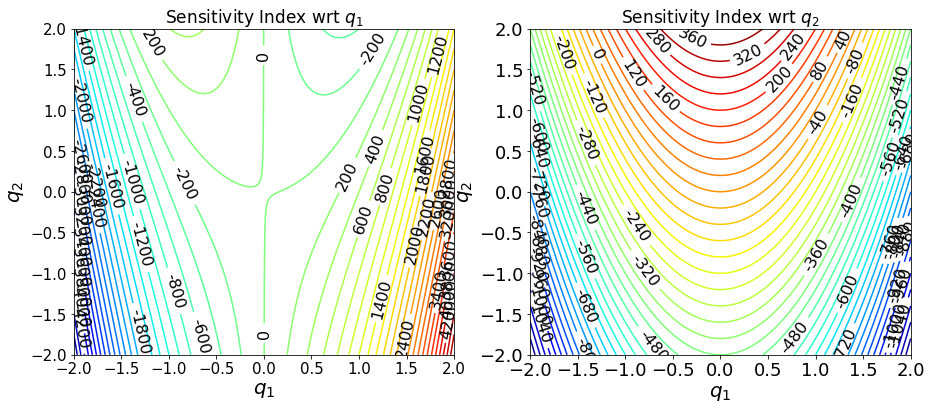

In [3]:
#------ SETTINGS
qBound=[[-2,2],  #range of q_1
        [-2,2]]  #range of q_2

#plot LSA indices
plot_Rosenbrock_LSACoefs(qBound,a=100,b=1)

**Discussion**
* The local sensitivity indices change with the variation in the nominal $\bar{q}_1$ and $\bar{q}_2$.
* Whether or not parameters $q_1$ and $q_2$ are correlated, no impact would be reflected in the sensitivity indices (one parameter at the time). Besides linearization, this is a major shortcoming of the LSA. 

## Example: Sensitivity Analysis of Wall Functions
In wall-modelled turbulent simulations, we use wall functions to predict the wall shear stress $\tau_w$ or friction velocity $u_\tau$ using a sampled velocity $u_p$ from a point in the outer layer of the boundary layer (at the distance $y_p$ from the wall). 
The local sensitivity coefficients of different wall functions can be derived using Gateaux variation method, [Rezaeiravesh, 2018](https://www.diva-portal.org/smash/record.jsf?pid=diva2%3A1253918&dswid=-6165). Note that, the true value of the mean of a parameter is specified by a subindex $0$. Such true values can be taken from accurate simulations or experiments. 

**Data:** The data we are going to use here are from DNS (direct numerical simulation) of turbulent pipe flow at different Reynolds numbers by [J. Yao et al 2022](https://arxiv.org/abs/2207.06289). 
The data are available online at [this repository](https://dataverse.tdl.org/dataverse/turbpipe).

The following python function returns a subset of the above data at $Re_\tau$ equal to $550$, $1000$, $2000$, and $5200$. The data contains only the quantities needed for the wall functions. 

In [4]:
db=pipeDNSdata.read()    

print(db.keys())
print(db['Re1000'].keys())

dict_keys(['Re550', 'Re1000', 'Re2000', 'Re5200'])
dict_keys(['Re', 'y', 'y+', 'uTau', 'Uz', 'Uz+'])


We can plot $Uz^+-y^+$ at the four Reynolds numbers

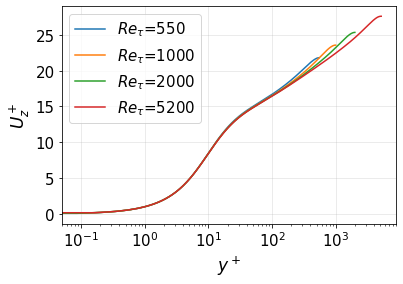

In [5]:
for Re_ in [550,1000,2000,5200]:
    ReStr='Re'+str(Re_)
    plt.semilogx(db[ReStr]['y+'],db[ReStr]['Uz+'],label=r'$Re_\tau$='+str(Re_))
plt.legend()    
plt.xlabel(r'$y^+$')
plt.ylabel(r'$U_z^+$')
plt.grid()

### The Logarithmic Law
$$
u^+=\frac{1}{\kappa} \log(y^+)+B
$$
where $u^+=u/u_\tau$, $y^+=yu_\tau/\nu$, $y$ is distance from the wall, $u$ is the time-averaged velocity, $\nu$ is kinematic viscosity, and $u_\tau$ is wall friction velocity defined as $u_\tau=\sqrt{\frac{\tau_w}{\rho}}$ with $\rho$ and $\tau_w$ denoting fluid density and wall shear stress, respectively. 

Here, the design parameter and model output are $y$ and $u_\tau$, respectively with the rest of quantities, i.e. $u$, $\kappa$ and $B$ being taken as uncertain. Our goal is to derive an expression between the local sensitivity of the parameters. Note that, the dependency of $u_\tau$ on the inputs cannot be explicitly expressed by a function.
Therefore, the Gateaux variational method is applied:

$$
\frac{u_0+\varepsilon \delta u}{u_{\tau_0}+\varepsilon \delta u_\tau}
=
\frac{1}{\kappa_0+\varepsilon \delta \kappa} \ln(\frac{y(u_{\tau_0}+\varepsilon \delta u_\tau)}{\nu}) + (B_0+\varepsilon \delta B)
$$

Taking derivatives with respect to $\varepsilon$ and rearranging the terms, the following expressions for the local sensitivity indices are obtained:

$$
\begin{eqnarray}\label{eq:logSens}
\frac{\delta u_\tau}{u_{\tau_0}}=X_u \frac{\delta u}{u_0} +X_\kappa \frac{\delta \kappa}{\kappa_0}+X_B \frac{\delta B}{B_0}
\end{eqnarray}
$$

where,

$$
\begin{eqnarray*}
X_u &=& u^+_0 / \mathcal{S}_1\\
X_\kappa &=& (\frac{1}{\kappa_0} lny^+_0) /\mathcal{S}_1 \\ 
X_B &=& - B_0/\mathcal{S}_1 \\ 
\mathcal{S}_1 &=&\left( \frac{1}{\kappa_0} + u^+_0 \right)
\end{eqnarray*}
$$

Note that the perturbation of each quantity is normalized by the associated nominal value.

Now, we can use the DNS data of pipe, [J. Yao et al 2022](https://arxiv.org/abs/2207.06289), for the range of validity of the log law, which we assume it to be from $y^+=150$ to $y^+=0.2 Re_\tau$. Considering this range, we can only use the pipe data at $Re_\tau=2000$ and $5200$. 
In particular we have $u_0=U_z$ at given $y$ (distance from the wall) and wall friction velocity $u_{\tau_0}$. We also need estimates for $\kappa_0$ and $B_0$ which are assumed to be $0.4$ and $5.0$, respectively. In fact, in the calibration (UQ inverse problems) part of the course, we will use the same data of the pipe flow to estimate these parameters. 

In [6]:
def logLawLSA(ypls,upls,uTau,kap,B):
    """
    Local sensitivity indices of the log law quantities
    """
    tmp=1/kap+upls
    Xu=upls/tmp
    Xk=np.log(ypls)/tmp/kap
    Xb=-B/tmp
    return Xu,Xk,Xb    

Call this function for the data at $Re_\tau=2000$ and $5000$.

Text(0, 0.5, 'LS Indices')

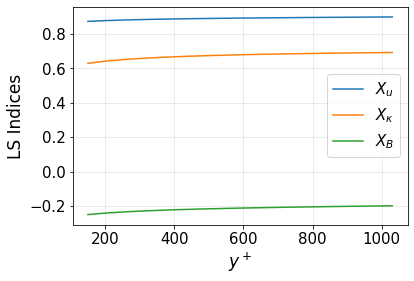

In [7]:
def dataSelector_logLaw(Re,db):
    """
    Select data with y+ within a given range
    """    
    db_=db['Re'+str(Re)]
    I=np.where(db_['y+']<0.2*Re)[0]
    I2=np.where(150<db_['y+'])[0]    
    return db_['uTau'],db_['y+'][I2[0]:I[-1]],db_['Uz+'][I2[0]:I[-1]]

#extract the (y+,u+) data in the range of validity of the wall function
uTau,yp,up=dataSelector_logLaw(5200,db)

#LSA
Xu,Xk,Xb=logLawLSA(yp,up,uTau,kap=0.4,B=5.)

#plot
plt.plot(yp,Xu,label=r'$X_u$')
plt.plot(yp,Xk,label=r'$X_\kappa$')
plt.plot(yp,Xb,label=r'$X_B$')
plt.legend()
plt.grid()
plt.xlabel(r'$y^+$')
plt.ylabel('LS Indices')

**Discussion** 

* What can be inferred from the LSA indices at different $y^+$? Motivate your answer considering the normalized perturbations in $u$, $\kappa$, and $B$. 
* What is the connection between the LSA expression and uncertainty propagation by the perturbation method? For instance, assume $u\sim\mathcal{N}(0,\sigma_u^2)$, $\kappa\sim\mathcal{N}(0,\sigma_\kappa^2)$, and $B\sim\mathcal{N}(0,\sigma_B^2)$. 

### Hands-on 1: Damped Harmonic Oscillator
Consider the simple system consisting of a mass $m$, a damper with damping coefficient $c$, and a spring with constant $k$. For oscillations with no forcing in the vertical direction, the dynamics of the system is described by the following 2nd-order ODE:
    
$$
\begin{equation}
\ddot{y} + C \dot{y} + K y =0 \,, \quad y(0)=y_0 \,, \dot{y}(0)=v_0
\end{equation}
$$

where $y$ is the distance from the fixed point measured downward, $C=c/m$, and $K=k/m$. The analytical solution for the above ODE is,

$$
\begin{equation}
   y(t)=\exp(-C\,t/2) \left(c_1\cos(\omega t) + c_2 \sin(\omega t) \right)
\end{equation}
$$

where $c_1=y_0$, $c_2=(v_0+C y_0/2)/\omega$, and $\omega = \sqrt{K-C^2/4}$. 

* Assume $K\sim\mathcal{N}(20,1^2)$, $C\sim\mathcal{N}(1,0.1^2)$, $y_0\sim\mathcal{N}(0,0.15^2)$, and $v_0\sim\mathcal{N}(1,0.1^2)$ and evaluate the sensitivity indices over time from $t=0$ to $t=6$. 

* What can be inferred from the local sensitivity indices?
* How would the sensitivities change with the nominal value of the parameters?

### Hands-on 2: The Spalding Law
In 1961, [Spalding](https://asmedigitalcollection.asme.org/appliedmechanics/article-abstract/28/3/455/386110/A-Single-Formula-for-the-Law-of-the-Wall?redirectedFrom=fulltext) proposed a single composite profile that covers the viscous sublayer, buffer layer and logarithmic region of an equilibrium boundary layer. Contrary to other attempts, Spalding expressed $y^+$ in terms of $u^+$:

$$
\begin{equation}\label{eq:spaldinglaw}
y^+=u^+ + e^{-\kappa B}\left[e^{\kappa u^+} - \sum_{m=0}^{N_{S}} \frac{(\kappa u^+)^m}{m!}\right]
\end{equation}
$$

where $N_{S}$ was suggested to be either $3$ or $4$ without any known advantage of one over the other.

Applying the Gateaux variational method and derive expressions for the sensitiviy indices (similar to the logarithmic law above). 

Use the DNS data of [J. Yao et al 2022](https://arxiv.org/abs/2207.06289) at the available $Re_\tau$. In each case extract the data associated to $y^+<0.2*Re_\tau$.

In [8]:
def dataSelector_SapldingLaw(Re,db):
    """
    Select y+ within a given range
    """    
    db_=db['Re'+str(Re)]
    I=np.where(db_['y+']<0.2*Re)[0]    
    return db_['uTau'],db_['y+'][:I[-1]],db_['Uz+'][:I[-1]]

#extract the (y+,u+) data in the range of validity of the wall function
uTau,yp,up=dataSelector_SapldingLaw(5200,db)